# Introduction

#### This is a data science journey where I will explore StackOverFlow survey data. I will go through the survey question and come up with 3 questions that I will answer with analysing the data. 

## Importing the required libraries

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


pd.set_option('display.max_columns', None)


In [152]:
# read the survey CSV file along with the schema which contain all columns definition 
# for the survey

survey_df = pd.read_csv('./developer_survey_2018/survey_results_public.csv')
schema_df = pd.read_csv('./developer_survey_2018/survey_results_schema.csv')

/Users/HassanTariq/anaconda3/envs/py-venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Explore the data 

In [153]:
# get an overview of the current surevy data
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


In [154]:
# get an overview of the current schema data
schema_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
Column          129 non-null object
QuestionText    129 non-null object
dtypes: object(2)
memory usage: 2.1+ KB


In [155]:
#How much data do we have (rows, columns) ?!
survey_df.shape

(98855, 129)

In [156]:
#How much data do we have (rows, columns) ?!
schema_df.shape

(129, 2)

In [157]:
# Skim through the data of questions 
schema_df

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."
...,...,...
124,Age,"What is your age? If you prefer not to answer,..."
125,Dependents,Do you have any children or other dependents t...
126,MilitaryUS,Are you currently serving or have you ever ser...
127,SurveyTooLong,How do you feel about the length of the survey...


In [158]:
# Skim through the data of questions 

survey_df.sample(10)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
79826,94235,No,Yes,United States,No,"Independent contractor, freelancer, or self-em...","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",NaN,Back-end developer;Desktop or enterprise appli...,15-17 years,15-17 years,Moderately satisfied,Moderately satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",More than 4 years ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U.S. dollars ($),NaN,Yearly,NaN,USD,Jira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92275,15643,Yes,Yes,Germany,No,"Independent contractor, freelancer, or self-em...","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",NaN,Back-end developer;Front-end developer;Full-st...,21-23 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python;SQL,Ocaml,MongoDB;Redis;MySQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10 (Very Likely),Multiple times per day,Yes,A few times per week,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Somewhat interested,Somewhat interested,A little bit interested,A little bit interested,A little bit interested,Between 7:01 - 8:00 AM,9 - 12 hours,1 - 2 hours,Never,NaN,3 - 4 times per week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86064,84466,Yes,Yes,Brazil,No,"Not employed, but looking for work","Bachelor’s degree (BA, BS, B.Eng., etc.)

In [159]:
# Find out how many missing values are there in each columns. 
missing_values = ((survey_df.isna().sum()/survey_df.shape[0])*100).sort_values()

In [160]:
# Find the top 20 missing values per columns
missing_values.tail(20)

Salary                        48.836174
JobContactPriorities5         50.729857
JobContactPriorities1         50.729857
JobContactPriorities2         50.729857
JobContactPriorities4         50.729857
JobContactPriorities3         50.729857
ConvertedSalary               51.745486
JobEmailPriorities7           53.251732
JobEmailPriorities5           53.251732
JobEmailPriorities6           53.251732
JobEmailPriorities4           53.251732
JobEmailPriorities3           53.251732
JobEmailPriorities2           53.251732
JobEmailPriorities1           53.251732
StackOverflowJobsRecommend    61.239189
AdBlockerReasons              61.817814
ErgonomicDevices              65.547519
HackathonReasons              74.011431
MilitaryUS                    84.036215
TimeAfterBootcamp             93.270952
dtype: float64

#### Quick Overview:
 We have 98855 records in total. Each record corresponds to survey participants who answered a total of 129 survey questions. 87 of the survey questions (columns) answered with text where the 41 questions (columns) answered with float and only 1 column containing an integer value. In terms of missing values, we have 19 out of 129 columns with 50% missing values.

#### Interesting questions about the data:
- What is the most used programming language among survey respondents?
- Which programing language has a positive correlation with high career satisfaction?
- Which platform and IDE are highly popular among the developer ?


# Data Processing:

#### We need to get rid off the columns with missing values that has more than 50%

In [161]:
# To be removed columns
tbr_col =missing_values[missing_values> 50]

In [162]:
# Check the list of columns 
tbr_col.index

Index(['JobContactPriorities5', 'JobContactPriorities1',
       'JobContactPriorities2', 'JobContactPriorities4',
       'JobContactPriorities3', 'ConvertedSalary', 'JobEmailPriorities7',
       'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities4',
       'JobEmailPriorities3', 'JobEmailPriorities2', 'JobEmailPriorities1',
       'StackOverflowJobsRecommend', 'AdBlockerReasons', 'ErgonomicDevices',
       'HackathonReasons', 'MilitaryUS', 'TimeAfterBootcamp'],
      dtype='object')

In [163]:
# How many columns are we going to remove?
len(tbr_col)

# Save the list of te be removed columns 
tbr_col_list = list(tbr_col.index)

In [164]:
# Create a new data frame where are we going to do our cleaning process
preprocessing_df = survey_df

# drop the columns listed in the tbr_col_list
preprocessing_df = preprocessing_df.drop(columns= tbr_col_list, axis= 1)

# check 
preprocessing_df.shape

(98855, 110)

In [165]:
#instead of depending on index, we will create survey_id to have all the indexs
#preprocessing_df['survey_id']= preprocessing_df.index


#### We have just finished with removed the columns with more than 50% NAN values. The process starts with getting the list of to be removed columns from missing_values series that we have previously. Once we got the list, we used the .drop pandas method to drop all the no longer needed columns.

In [166]:
def clean_multi_value_col (dataframe, dataframe_index , columns , seperator):
    dataframe= dataframe.fillna('No Selection')

    col_list = dataframe[columns].str.split(seperator).tolist()

        #Step 3: We start with creating a new dataframe from the series with EmployeeId as the index
    dataframe = pd.DataFrame(col_list, index=survey_df[dataframe_index]).stack()

        #Step 4: We now want to get rid of the secondary index To do this, we will 
        # make EmployeeId as a column (it can't be an index since the values will be duplicate)
    dataframe = dataframe.reset_index([0, dataframe_index])

        #Step 5: Give the new created columns name
    dataframe.columns = [dataframe_index, columns]
    
    return dataframe;
    

### Create Separate dataset to answer each question 

#### Preparing question 1 dataset : What is the most famous programming language among developer ?

In [167]:

Q1_df = preprocessing_df.loc[:, ['Respondent','Age','Gender', 'DevType', 'LanguageWorkedWith','DatabaseWorkedWith']]
Q1_df.head()

,Respondent,Age,Gender,DevType,LanguageWorkedWith,DatabaseWorkedWith
0,1,25 - 34 years old,Male,Full-stack developer,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...
1,3,35 - 44 years old,Male,Database administrator;DevOps specialist;Full-...,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached
2,4,NaN,NaN,Engineering manager;Full-stack developer,NaN,NaN
3,5,35 - 44 years old,Male,Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ..."
4,7,18 - 24 years old,Male,Data or business analyst;Desktop or enterprise...,C;C++;Java;Matlab;R;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2


#### from the above data frame of question#1, we need to further clean the data to make it easier for analysis.

#### What do we need to do?
1) Clean DevType column by splitting each value in DevType column to an individual column. For example, if the column contains "Engineering manager; Full-stack developer", then we need to have it as the Engineering manager column and DevOps column. This process called "Hot encoding"

2) Clean LanguageWorkedWith column by splitting each value in LanguageWorkedWith column to an individual column. For example, if the column contains "JavaScript; Python", then we need to have it as a JavaScript column and Python column. This process called "Hot encoding"

3) Clean DatabaseWorkedWith the same way that we mentioned before.

#### How are we going to do it?
- Create a function that will take the data frame and the column that you would like to transform. The return value of this function should be the data frame after transforming the columns.

In [168]:
def multi_hot_encoding (dataframe, dataframe_index , columns , seperator, prefix):
    
    #Step 1: Fill NAN with meaningfull text. This step is essential since below code 
    # will not work if you have NAN values because it will consider NAN values as float not string
    dataframe= dataframe.fillna('No Selection')
    col_index = dataframe[dataframe_index]
    

    #Step 2: Create list to store each selection and the save the index in seperate variable
    col_list = dataframe[columns].str.split(';').tolist()

    #Step 3: We start with creating a new dataframe from the series with EmployeeId as the index
    dataframe = pd.DataFrame(col_list, index=col_index).stack()

    #Step 4: We now want to get rid of the secondary index To do this, we will 
    # make EmployeeId as a column (it can't be an index since the values will be duplicate)
    dataframe = dataframe.reset_index([0, dataframe_index])

    #Step 5: Give the new created columns name
    dataframe.columns = [dataframe_index, columns]
    #dataframe.head()
    
    #Step 6: Create a dummy value 
    dataframe= pd.get_dummies(dataframe, prefix= prefix)

    #Step 5
    # group by all the value survey_id  
    dataframe= dataframe.groupby(dataframe_index).sum()
    
    return dataframe



In [169]:
Q1_final_df = test_df
index_col= 'Respondent'
columns= ['DevType', 'LanguageWorkedWith', 'DatabaseWorkedWith']
seperator= ';'
prefix= ['DT', 'LWW', 'DWW']

counter = 0

for col in columns:
    temp_df = multi_hot_encoding (Q1_final_df, index_col , col , seperator, prefix[counter])
    Q1_final_df = pd.merge(Q1_final_df, temp_df, on='Respondent', how='inner')
    Q1_final_df = Q1_final_df.drop(col, axis=1)
    counter +=1


    

In [170]:
# Quick look into our final dataframe which will use to analyse
Q1_final_df.sample()

,Respondent,Age,Gender,DT_Back-end developer,"DT_C-suite executive (CEO, CTO, etc.)",DT_Data or business analyst,DT_Data scientist or machine learning specialist,DT_Database administrator,DT_Designer,DT_Desktop or enterprise applications developer,DT_DevOps specialist,DT_Educator or academic researcher,DT_Embedded applications or devices developer,DT_Engineering manager,DT_Front-end developer,DT_Full-stack developer,DT_Game or graphics developer,DT_Marketing or sales professional,DT_Mobile developer,DT_No Selection,DT_Product manager,DT_QA or test developer,DT_Student,DT_System administrator,LWW_Assembly,LWW_Bash/Shell,LWW_C,LWW_C#,LWW_C++,LWW_CSS,LWW_Clojure,LWW_Cobol,LWW_CoffeeScript,LWW_Delphi/Object Pascal,LWW_Erlang,LWW_F#,LWW_Go,LWW_Groovy,LWW_HTML,LWW_Hack,LWW_Haskell,LWW_Java,LWW_JavaScript,LWW_Julia,LWW_Kotlin,LWW_Lua,LWW_Matlab,LWW_No Selection,LWW_Objective-C,LWW_Ocaml,LWW_PHP,LWW_Perl,LWW_Python,LWW_R,LWW_Ruby,LWW_Rust,LWW_SQL,LWW_Scala,LWW_Swift,LWW_TypeScript,LWW_VB.NET,LWW_VBA,LWW_Visual Basic 6,DWW_Amazon DynamoDB,DWW_Amazon RDS/Aurora,DWW_Amazon Redshift,DWW_Apache HBase,DWW_Apache Hive,DWW_Cassandra,DWW_Elasticsearch,DWW_Google BigQuery,DWW_Google Cloud Storage,DWW_IBM Db2,DWW_MariaDB,DWW_Memcached,"DWW_Microsoft Azure (Tables, CosmosDB, SQL, etc)",DWW_MongoDB,DWW_MySQL,DWW_Neo4j,DWW_No Selection,DWW_Oracle,DWW_PostgreSQL,DWW_Redis,DWW_SQL Server,DWW_SQLite
35515,50473,18 - 24 years old,Male,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1


In [171]:
Q1_final_df.shape

(98855, 85)

#### Preparing question 2 dataset : Which programing language has positive correlation with high career satisfaction ?

In [172]:
Q2_df = preprocessing_df.loc[:, ['Respondent','Age','Gender', 'DevType', 'LanguageWorkedWith', 'CareerSatisfaction']]
Q2_df.head()

,Respondent,Age,Gender,DevType,LanguageWorkedWith,CareerSatisfaction
0,1,25 - 34 years old,Male,Full-stack developer,JavaScript;Python;HTML;CSS,Extremely satisfied
1,3,35 - 44 years old,Male,Database administrator;DevOps specialist;Full-...,JavaScript;Python;Bash/Shell,Neither satisfied nor dissatisfied
2,4,NaN,NaN,Engineering manager;Full-stack developer,NaN,Moderately satisfied
3,5,35 - 44 years old,Male,Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,Slightly dissatisfied
4,7,18 - 24 years old,Male,Data or business analyst;Desktop or enterprise...,C;C++;Java;Matlab;R;SQL;Bash/Shell,Moderately satisfied


##### from the above dataframe of question#2, we need to further clean the data to make it easier for analysis.

##### We will use the same function which we create in question 1 to clean andd process the data 


In [173]:
Q2_final_df = Q2_df
index_col= 'Respondent'
columns= ['DevType', 'LanguageWorkedWith','CareerSatisfaction']
seperator= ';'
prefix= ['DT', 'LWW', 'CS']

counter = 0

for col in columns:
    temp_df = multi_hot_encoding (Q2_final_df, index_col , col , seperator, prefix[counter])
    Q2_final_df = pd.merge(Q2_final_df, temp_df, on='Respondent', how='inner')
    Q2_final_df = Q2_final_df.drop(col, axis=1)
    counter +=1

In [174]:
Q2_final_df.sample()

,Respondent,Age,Gender,DT_Back-end developer,"DT_C-suite executive (CEO, CTO, etc.)",DT_Data or business analyst,DT_Data scientist or machine learning specialist,DT_Database administrator,DT_Designer,DT_Desktop or enterprise applications developer,DT_DevOps specialist,DT_Educator or academic researcher,DT_Embedded applications or devices developer,DT_Engineering manager,DT_Front-end developer,DT_Full-stack developer,DT_Game or graphics developer,DT_Marketing or sales professional,DT_Mobile developer,DT_No Selection,DT_Product manager,DT_QA or test developer,DT_Student,DT_System administrator,LWW_Assembly,LWW_Bash/Shell,LWW_C,LWW_C#,LWW_C++,LWW_CSS,LWW_Clojure,LWW_Cobol,LWW_CoffeeScript,LWW_Delphi/Object Pascal,LWW_Erlang,LWW_F#,LWW_Go,LWW_Groovy,LWW_HTML,LWW_Hack,LWW_Haskell,LWW_Java,LWW_JavaScript,LWW_Julia,LWW_Kotlin,LWW_Lua,LWW_Matlab,LWW_No Selection,LWW_Objective-C,LWW_Ocaml,LWW_PHP,LWW_Perl,LWW_Python,LWW_R,LWW_Ruby,LWW_Rust,LWW_SQL,LWW_Scala,LWW_Swift,LWW_TypeScript,LWW_VB.NET,LWW_VBA,LWW_Visual Basic 6,CS_Extremely dissatisfied,CS_Extremely satisfied,CS_Moderately dissatisfied,CS_Moderately satisfied,CS_Neither satisfied nor dissatisfied,CS_No Selection,CS_Slightly dissatisfied,CS_Slightly satisfied
78108,74547,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [175]:
Q2_final_df.shape

(98855, 71)

In [176]:
survey_df.SelfTaughtTypes.isna().sum()

41501

#### Preparing question 3 dataset : Which platform and IDE is highly popular among developer ?


In [177]:
Q3_df = preprocessing_df.loc[:, ['Respondent','Age','Gender', 'PlatformWorkedWith', 'FrameworkWorkedWith', 'IDE']]
Q3_df.head()

,Respondent,Age,Gender,PlatformWorkedWith,FrameworkWorkedWith,IDE
0,1,25 - 34 years old,Male,AWS;Azure;Linux;Firebase,Django;React,Komodo;Vim;Visual Studio Code
1,3,35 - 44 years old,Male,Linux,Django,IPython / Jupyter;Sublime Text;Vim
2,4,NaN,NaN,NaN,NaN,NaN
3,5,35 - 44 years old,Male,Azure,NaN,Visual Studio;Visual Studio Code
4,7,18 - 24 years old,Male,Arduino;Windows Desktop or Server,NaN,Notepad++;Visual Studio;Visual Studio Code


##### from the above dataframe of question#3, we need to further clean the data to make it easier for analysis.

##### We will use the same function which we create in question 1 to clean andd process the data 


In [178]:
Q3_final_df = Q3_df
index_col= 'Respondent'
columns= ['PlatformWorkedWith', 'IDE', 'FrameworkWorkedWith']
seperator= ';'

counter = 0
# A dictionary to use when we store all the dataframe we have to answer the first question
Q3_df_dic = {}

# For loop to loop through all the columns and store each produced dataframe into dictionary
for col in columns:
    temp_df = clean_multi_value_col (Q3_final_df, index_col , col , seperator)
    Q3_df_dic[col] = temp_df
    counter +=1

In [179]:
# Get rid off NAN or No Selection values

PWW_df = Q3_df_dic.get('PlatformWorkedWith')
PWW_df= PWW_df[PWW_df['PlatformWorkedWith'] != 'No Selection']

IDE_df = Q3_df_dic.get('IDE')
IDE_df= IDE_df[IDE_df['IDE'] != 'No Selection']

FWW_df = Q3_df_dic.get('FrameworkWorkedWith')
FWW_df= FWW_df[FWW_df['FrameworkWorkedWith'] != 'No Selection']

In [180]:
# Save all data frame into CSV to be used by external BI application
PWW_df.to_csv('StackOverflow_PlatformWorkedWith.csv', index= False)
IDE_df.to_csv('StackOverflow_IDE.csv', index= False)
FWW_df.to_csv('StackOverflow_FrameworkWorkedWith.csv', index= False)

In [181]:
PWW_df = (PWW_df.groupby(['PlatformWorkedWith']).count()).sort_values('Respondent')
IDE_df = (IDE_df.groupby(['IDE']).count()).sort_values('Respondent')
FWW_df = (FWW_df.groupby(['FrameworkWorkedWith']).count()).sort_values('Respondent')

In [182]:
# Save all data frame into CSV to be used by external BI application
PWW_df.to_csv('StackOverflow_PlatformWorkedWith.csv', index=False)
IDE_df.to_csv('StackOverflow_IDE.csv', index=False)
FWW_df.to_csv('StackOverflow_FrameworkWorkedWith.csv', index=False)

In [183]:
PWW_df.sample()

,Respondent
PlatformWorkedWith,
Salesforce,1457


In [184]:
IDE_df.sample()

,Respondent
IDE,
Atom,13576


In [185]:
FWW_df.sample()

,Respondent
FrameworkWorkedWith,
Torch/PyTorch,868


In [186]:
Q3_final_df.shape

(98855, 6)

### We have just finished with getting the data for all the three questions we have listed above. To make all the three data set avaliable for more analysis using Tableaue or Power BI, I will export each dataset as CSV.

In [187]:
# Export question 1
Q1_final_df.to_csv (r'/Users/HassanTariq/Q1_final_df.csv', index = None, header=True) 
Q2_final_df.to_csv (r'/Users/HassanTariq/Q2_final_df.csv', index = None, header=True) 
Q3_final_df.to_csv (r'/Users/HassanTariq/Q3_final_df.csv', index = None, header=True) 


# Data Analysis:

### Analysis to answer question # 1

#### Question# 1 recap

Question 1 was asking about the most used programming language among developer. Our dataset contain the following columns:

- Respondent
- Age
- Gender
- DT (DevType) containing the versious devtype for each respondent
- LWW (LanguageWorkWith) list of all programing language that each survey respondent has exprience with.
- DWW (DatabaseWorkWith) list of all database that each survey respondent has exprience with.


In [188]:
Q1_final_df.columns

Index(['Respondent', 'Age', 'Gender', 'DT_Back-end developer',
       'DT_C-suite executive (CEO, CTO, etc.)', 'DT_Data or business analyst',
       'DT_Data scientist or machine learning specialist',
       'DT_Database administrator', 'DT_Designer',
       'DT_Desktop or enterprise applications developer',
       'DT_DevOps specialist', 'DT_Educator or academic researcher',
       'DT_Embedded applications or devices developer',
       'DT_Engineering manager', 'DT_Front-end developer',
       'DT_Full-stack developer', 'DT_Game or graphics developer',
       'DT_Marketing or sales professional', 'DT_Mobile developer',
       'DT_No Selection', 'DT_Product manager', 'DT_QA or test developer',
       'DT_Student', 'DT_System administrator', 'LWW_Assembly',
       'LWW_Bash/Shell', 'LWW_C', 'LWW_C#', 'LWW_C++', 'LWW_CSS',
       'LWW_Clojure', 'LWW_Cobol', 'LWW_CoffeeScript',
       'LWW_Delphi/Object Pascal', 'LWW_Erlang', 'LWW_F#', 'LWW_Go',
       'LWW_Groovy', 'LWW_HTML', 'LWW_Hack

#### What is the popular DevType among survey respondent ?

In [189]:
# First of all, we need to filter columns name using list comperhension
dev_type_col = []
dev_type_col = [col for col in Q1_final_df if col.startswith('DT_')]
dev_type_col.append('Respondent')
dev_type_col.append('Age')
dev_type_col.append('Gender')


In [190]:
dev_type_col

['DT_Back-end developer',
 'DT_C-suite executive (CEO, CTO, etc.)',
 'DT_Data or business analyst',
 'DT_Data scientist or machine learning specialist',
 'DT_Database administrator',
 'DT_Designer',
 'DT_Desktop or enterprise applications developer',
 'DT_DevOps specialist',
 'DT_Educator or academic researcher',
 'DT_Embedded applications or devices developer',
 'DT_Engineering manager',
 'DT_Front-end developer',
 'DT_Full-stack developer',
 'DT_Game or graphics developer',
 'DT_Marketing or sales professional',
 'DT_Mobile developer',
 'DT_No Selection',
 'DT_Product manager',
 'DT_QA or test developer',
 'DT_Student',
 'DT_System administrator',
 'Respondent',
 'Age',
 'Gender']

In [191]:
popular_devtype = Q1_final_df[dev_type_col]
dev_type_col = [col for col in Q1_final_df if col.startswith('DT_')]


In [192]:
top_10 = (Q1_final_df.groupby(dev_type_col)['Respondent'].count())

Q1_final_df.groupby(dev_type_col)['Respondent']

In [193]:
Q1_final_df.groupby(['DT_Data or business analyst']).count()

,Respondent,Age,Gender,DT_Back-end developer,"DT_C-suite executive (CEO, CTO, etc.)",DT_Data scientist or machine learning specialist,DT_Database administrator,DT_Designer,DT_Desktop or enterprise applications developer,DT_DevOps specialist,DT_Educator or academic researcher,DT_Embedded applications or devices developer,DT_Engineering manager,DT_Front-end developer,DT_Full-stack developer,DT_Game or graphics developer,DT_Marketing or sales professional,DT_Mobile developer,DT_No Selection,DT_Product manager,DT_QA or test developer,DT_Student,DT_System administrator,LWW_Assembly,LWW_Bash/Shell,LWW_C,LWW_C#,LWW_C++,LWW_CSS,LWW_Clojure,LWW_Cobol,LWW_CoffeeScript,LWW_Delphi/Object Pascal,LWW_Erlang,LWW_F#,LWW_Go,LWW_Groovy,LWW_HTML,LWW_Hack,LWW_Haskell,LWW_Java,LWW_JavaScript,LWW_Julia,LWW_Kotlin,LWW_Lua,LWW_Matlab,LWW_No Selection,LWW_Objective-C,LWW_Ocaml,LWW_PHP,LWW_Perl,LWW_Python,LWW_R,LWW_Ruby,LWW_Rust,LWW_SQL,LWW_Scala,LWW_Swift,LWW_TypeScript,LWW_VB.NET,LWW_VBA,LWW_Visual Basic 6,DWW_Amazon DynamoDB,DWW_Amazon RDS/Aurora,DWW_Amazon Redshift,DWW_Apache HBase,DWW_Apache Hive,DWW_Cassandra,DWW_Elasticsearch,DWW_Google BigQuery,DWW_Google Cloud Storage,DWW_IBM Db2,DWW_MariaDB,DWW_Memcached,"DWW_Microsoft Azure (Tables, CosmosDB, SQL, etc)",DWW_MongoDB,DWW_MySQL,DWW_Neo4j,DWW_No Selection,DWW_Oracle,DWW_PostgreSQL,DWW_Redis,DWW_SQL Server,DWW_SQLite
DT_Data or business analyst,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,91296,59296,59194,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296,91296
1,7559,5278,5275,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559,7559


In [194]:
Q1_final_df['DT_Data or business analyst'].sum()

7559

In [195]:
# Assign the variable we are going to use for our clean_multi_value_col function
Q1_analsyis_df = Q1_df
index_col= 'Respondent'
columns= ['DevType', 'LanguageWorkedWith', 'DatabaseWorkedWith']
seperator= ';'

counter = 0
# A dictionary to use when we store all the dataframe we have to answer the first question
Q1_df_dic = {}

# For loop to loop through all the columns and store each produced dataframe into dictionary
for col in columns:
    temp_df = clean_multi_value_col (Q1_analsyis_df, index_col , col , seperator)
    Q1_df_dic[col] = temp_df
    counter +=1

In [196]:
devType_df = Q1_df_dic.get('DevType')
devType_df= devType_df[devType_df['DevType'] != 'No Selection']

languageWorkedWith_df = Q1_df_dic.get('LanguageWorkedWith')
languageWorkedWith_df= languageWorkedWith_df[languageWorkedWith_df['LanguageWorkedWith'] != 'No Selection']

databaseWorkedWith_df = Q1_df_dic.get('DatabaseWorkedWith')
databaseWorkedWith_df= databaseWorkedWith_df[databaseWorkedWith_df['DatabaseWorkedWith'] != 'No Selection']


In [197]:
# Save all data frame into CSV to be used by external BI application
devType_df.to_csv('StackOverflow_DevType.csv', index=False)
languageWorkedWith_df.to_csv('StackOverflow_languageWorkedWith.csv', index=False)
databaseWorkedWith_df.to_csv('StackOverflow_databaseWorkedWith.csv', index=False)

In [198]:
devType_df = (devType_df.groupby(['DevType']).count()).sort_values('Respondent')
languageWorkedWith_df = (languageWorkedWith_df.groupby(['LanguageWorkedWith']).count()).sort_values('Respondent')
databaseWorkedWith_df = (databaseWorkedWith_df.groupby(['DatabaseWorkedWith']).count()).sort_values('Respondent')

In [199]:
# This section has been added to store the top 10 values in variable which we will use later on to answer question 2
top10_DT_col= ((devType_df.tail(10)).index).tolist()
top10_LWW_col= (languageWorkedWith_df.tail(10)).columns
top10_DWW_col= (databaseWorkedWith_df.tail(10)).columns

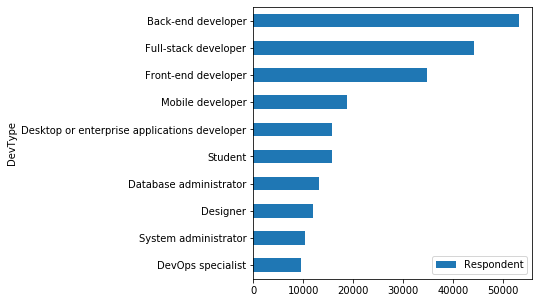

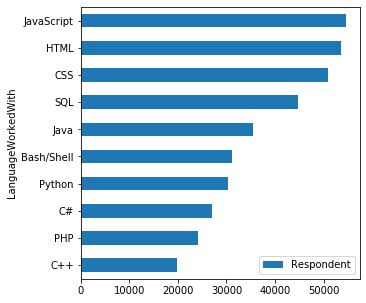

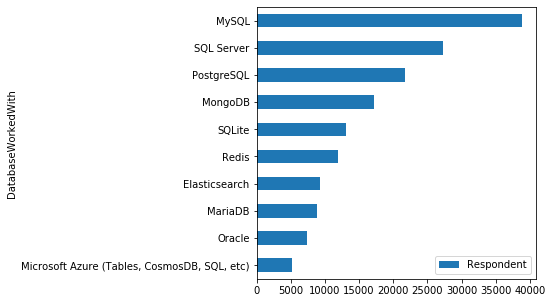

In [200]:
devType_df.tail(10).plot(kind= 'barh',  figsize=(5,5))
languageWorkedWith_df.tail(10).plot(kind= 'barh',  figsize=(5,5))
databaseWorkedWith_df.tail(10).plot(kind= 'barh',  figsize=(5,5))

#### Answering Question #1:

Among the survey respondent, the top developer types were web developers and mobile developers. It is clearly showing that these kinds of developer types are the trend right now and this is what most people interested in right now.

In align with what we observe in the DevType chart, the top language worked with among the developer were javascript, HTML, CSS...etc and this is the language you need to know if you are planning to be a web developer. I was astonished when I found out that python comes in 7th place. I assumed that Python would be at the top of rank since it is easy to learn a programming language and it can be used in many areas including web development. The reason behind the current rank of Python among other programming language is unknown. However, I would make an assumption that python still young programing language and it is going to one of the top 5 soon. 

In terms of database, survey respondent has worked with, MySQL comes in top of the rank. This due to MySQL is mainly used for the PHP projects or applications (associated with web development). In second place was SQL Server which mainly used with .Net development. 

### Analysis to answer question # 2

#### Question# 2 recap

Question 2 was asking about the corrleation between career satsfaction the language used. Our dataset contain the following columns:

- Respondent
- Age
- Gender
- DT (DevType) containing the versious devtype for each respondent
- LWW (LanguageWorkWith) list of all programing language that each survey respondent has exprience with.
- CareerSatisfaction (CareerSatisfaction).


In [201]:
Q2_final_df.sample()

,Respondent,Age,Gender,DT_Back-end developer,"DT_C-suite executive (CEO, CTO, etc.)",DT_Data or business analyst,DT_Data scientist or machine learning specialist,DT_Database administrator,DT_Designer,DT_Desktop or enterprise applications developer,DT_DevOps specialist,DT_Educator or academic researcher,DT_Embedded applications or devices developer,DT_Engineering manager,DT_Front-end developer,DT_Full-stack developer,DT_Game or graphics developer,DT_Marketing or sales professional,DT_Mobile developer,DT_No Selection,DT_Product manager,DT_QA or test developer,DT_Student,DT_System administrator,LWW_Assembly,LWW_Bash/Shell,LWW_C,LWW_C#,LWW_C++,LWW_CSS,LWW_Clojure,LWW_Cobol,LWW_CoffeeScript,LWW_Delphi/Object Pascal,LWW_Erlang,LWW_F#,LWW_Go,LWW_Groovy,LWW_HTML,LWW_Hack,LWW_Haskell,LWW_Java,LWW_JavaScript,LWW_Julia,LWW_Kotlin,LWW_Lua,LWW_Matlab,LWW_No Selection,LWW_Objective-C,LWW_Ocaml,LWW_PHP,LWW_Perl,LWW_Python,LWW_R,LWW_Ruby,LWW_Rust,LWW_SQL,LWW_Scala,LWW_Swift,LWW_TypeScript,LWW_VB.NET,LWW_VBA,LWW_Visual Basic 6,CS_Extremely dissatisfied,CS_Extremely satisfied,CS_Moderately dissatisfied,CS_Moderately satisfied,CS_Neither satisfied nor dissatisfied,CS_No Selection,CS_Slightly dissatisfied,CS_Slightly satisfied
39478,56050,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [202]:
Q2_analysis_df = Q2_final_df

#### Since we 71 columns and we would like to see if there is a corrleation or not, we need to reduce the number of columns to make corrleation table easy to read and follow. We will only take the top 10 of DevType and LanguageWorkedWith .

In [203]:
LWW_col = [col for col in Q2_analysis_df if col.startswith('LWW_') or col.startswith('CS_') ]

Q2_LWW_df= Q2_analysis_df[LWW_col]

Q2_LWW_df.corr()

,LWW_Assembly,LWW_Bash/Shell,LWW_C,LWW_C#,LWW_C++,LWW_CSS,LWW_Clojure,LWW_Cobol,LWW_CoffeeScript,LWW_Delphi/Object Pascal,LWW_Erlang,LWW_F#,LWW_Go,LWW_Groovy,LWW_HTML,LWW_Hack,LWW_Haskell,LWW_Java,LWW_JavaScript,LWW_Julia,LWW_Kotlin,LWW_Lua,LWW_Matlab,LWW_No Selection,LWW_Objective-C,LWW_Ocaml,LWW_PHP,LWW_Perl,LWW_Python,LWW_R,LWW_Ruby,LWW_Rust,LWW_SQL,LWW_Scala,LWW_Swift,LWW_TypeScript,LWW_VB.NET,LWW_VBA,LWW_Visual Basic 6,CS_Extremely dissatisfied,CS_Extremely satisfied,CS_Moderately dissatisfied,CS_Moderately satisfied,CS_Neither satisfied nor dissatisfied,CS_No Selection,CS_Slightly dissatisfied,CS_Slightly satisfied
LWW_Assembly,1.000000,0.123024,0.408712,0.072580,0.300002,0.064514,0.041157,0.088372,0.031644,0.090852,0.058823,0.039271,0.059684,0.024374,0.071708,0.065001,0.126585,0.146823,0.046958,0.068209,0.035386,0.117143,0.185839,-0.127313,0.066626,0.094553,0.086375,0.094487,0.145953,0.062517,0.042025,0.100131,0.063882,0.029472,0.046343,0.000508,0.073125,0.069769,0.107290,0.012584,0.012130,0.001038,-0.008937,0.015360,-0.012526,0.002458,-0.004740
LWW_Bash/Shell,0.123024,1.000000,0.192243,0.022663,0.167249,0.299140,0.073380,0.035601,0.119542,0.021895,0.069212,0.024823,0.196316,0.148513,0.307362,0.032213,0.102834,0.206190,0.290674,0.046449,0.058347,0.126703,0.103520,-0.347349,0.059836,0.057537,0.181530,0.183754,0.371942,0.111409,0.197577,0.107509,0.274377,0.123841,0.049541,0.112180,0.011768,0.045984,0.032866,-0.004202,0.065683,0.013066,0.093333,-0.001124,-0.190589,0.013088,0.027218
LWW_C,0.408712,0.192243,1.000000,0.097482,0.576113,0.100711,0.036241,0.072190,0.020106,0.074400,0.057047,0.028148,0.086408,0.027611,0.115616,0.047926,0.122098,0.235201,0.076975,0.059104,0.042150,0.131330,0.225139,-0.241839,0.133718,0.085365,0.125992,0.139255,0.248050,0.080506,0.047021,0.108038,0.098261,0.025768,0.089388,-0.015033,0.075310,0.060492,0.113167,0.012424,0.009837,0.006024,-0.007316,0.033547,-0.038834,0.013107,0.003666
LWW_C#,0.072580,0.022663,0.097482,1.000000,0.170532,0.248946,0.000807,0.037787,0.003442,0.078234,0.017214,0.149493,0.007771,-0.002964,0.257191,0.023666,0.030025,0.081846,0.257748,0.008200,0.009025,0.066891,0.051046,-0.313378,0.049372,0.014150,0.060534,0.014036,0.021876,0.004505,-0.010886,0.011489,0.311019,-0.013984,0.022534,0.205173,0.283063,0.146460,0.154929,-0.000632,0.037733,0.007513,0.063151,0.010298,-0.155486,0.018944,0.042254
LWW_C++,0.300002,0.167249,0.576113,0.170532,1.000000,0.094354,0.029688,0.058462,0.014147,0.080888,0.047645,0.033908,0.070827,0.022935,0.108811,0.046340,0.112376,0.221926,0.077879,0.055447,0.043771,0.129104,0.219340,-0.256731,0.111716,0.062571,0.109577,0.107198,0.250238,0.076057,0.032719,0.099783,0.095521,0.023688,0.073060,-0.000009,0.094835,0.070035,0.120806,0.005779,0.015577,0.007109,0.004781,0.036676,-0.059077,0.010817,0.008415
LWW_CSS,0.064514,0.299140,0.100711,0.248946,0.094354,1.000000,0.030829,0.032781,0.120430,0.034255,0.032236,0.031627,0.079892,0.054029,0.910902,0.023596,0.048880,0.215072,0.707115,0.007152,0.025815,0.072544,0.047010,-0.528154,0.042397,0.026667,0.412088,0.070919,0.172757,0.032069,0.151464,0.036282,0.468661,0.016760,0.046782,0.291364,0.141351,0.083617,0.101952,0.011670,0.072433,0.015636,0.088738,0.025068,-0.242253,0.028174,0.050565
LWW_Clojure,0.041157,0.073380,0.036241,0.000807,0.029688,0.030829,1.000000,0.069570,0.080075,0.036438,0.118012,0.101183,0.100134,0.086505,0.029397,0.110780,0.131708,0.052102,0.045063,0.103612,0.065297,0.064022,0.030521,-0.052571,0.036215,0.128905,0.004339,0.051544,0.059131,0.054456,0.082683,0.108946,0.027331,0.100911,0.035066,0.033418,0.008053,0.017178,0.025048,0.009134,0.017972,0.000916,0.007840,-0.001602,-0.027679,0.004484,-0.001962
LWW_Cobol,0.088372,0.035601,0.072190,0.037787,0.058462,0.032781,0.069570,1.000000,0.048774,0.123233,0.083210,0.066343,0.031417,0.050546,0.040843,0.138752,0.045488,0.057755,0.031598,0.106635,0.041218,0.063031,0.058053,-0.039660,0.048153,0.105380,0.043249,0.081704,0.019875,0.047767,0.033294,0.052157,0.054202,0.0456

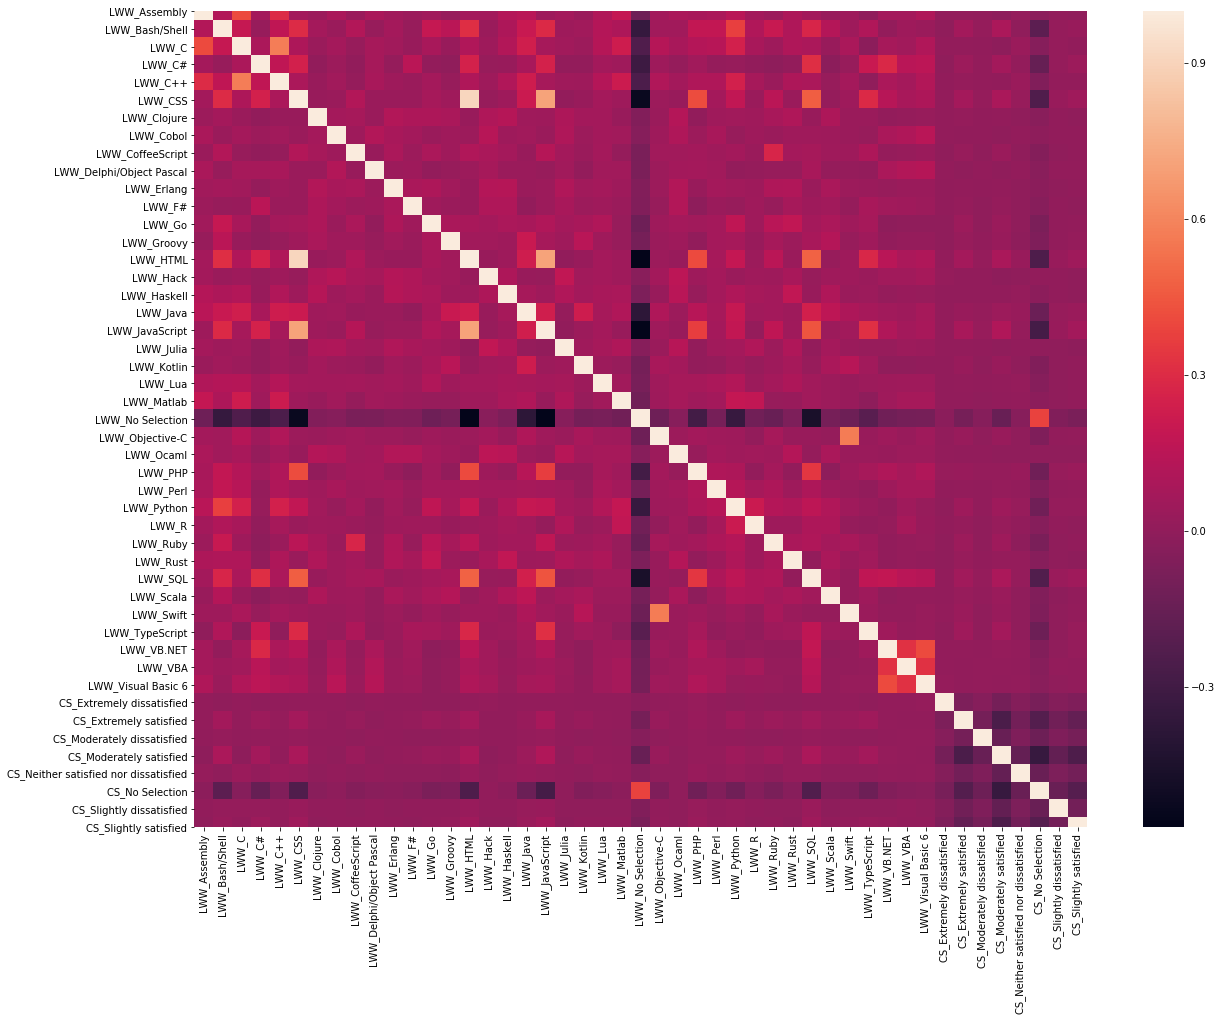

In [204]:
plt.subplots(figsize=(20,15))
sn.heatmap(Q2_LWW_df.corr())

In [205]:
# Assign the variable we are going to use for our clean_multi_value_col function
Q2_career_sat = Q2_df
index_col= 'Respondent'
columns= ['CareerSatisfaction']
seperator= ';'

counter = 0
# A dictionary to use when we store all the dataframe we have to answer the first question
Q2_df_dic = {}

# For loop to loop through all the columns and store each produced dataframe into dictionary
for col in columns:
    temp_df = clean_multi_value_col (Q2_career_sat, index_col , col , seperator)
    Q2_df_dic[col] = temp_df
    counter +=1

In [206]:
career_sat_df = Q2_df_dic.get('CareerSatisfaction')
career_sat_df= career_sat_df[career_sat_df['CareerSatisfaction'] != 'No Selection']
career_sat_df

,Respondent,CareerSatisfaction
0,1,Extremely satisfied
1,3,Neither satisfied nor dissatisfied
2,4,Moderately satisfied
3,5,Slightly dissatisfied
4,7,Moderately satisfied
...,...,...
87284,101429,Moderately satisfied
87285,101479,Moderately satisfied
87286,101575,Extremely dissatisfied
87287,101582,Moderately satisfied


In [207]:
# Save all data frame into CSV to be used by external BI application
career_sat_df.to_csv('StackOverflow_CareerSatisfaction.csv', index= False)

In [208]:
career_sat_df = (career_sat_df.groupby(['CareerSatisfaction']).count()/career_sat_df.shape[0]).sort_values('Respondent')


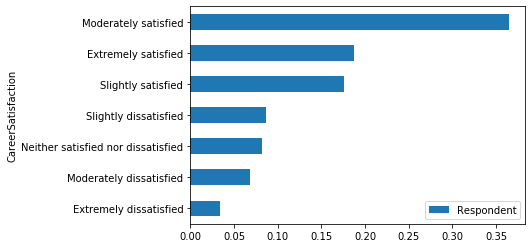

In [209]:
career_sat_df.plot(kind= 'barh')

#### Answering Question #2:

Based on the correlation matrix above, we can conclude that there is no obvious strong or weak correlation. It might be because of the lack of enough respondents in the survey. The highest correlation available between respondents who moderately satisfied and working with Javascript but in my opinion, there is no strong evidence to support this.

One of the interesting observations I found in the data, 35% of the survey respondent who answered the question of how would you rate your career satisfaction level were moderately satisfied. On the other hand, there are 20% were extremely satisfied. Comparing the extremely satisfied and extremely dissatisfied, we can see less than 0.05% were extremely dissatisfied.

### Analysis to answer question # 3

#### Question# 3 recap

Question 3 was asking about the platform and IDE mostly used by developer. Our dataset contain the following columns:

- Respondent
- Age
- Gender
- PWW (PlatformWorkedWith) containing the versious devtype for each respondent
- IDE (IDE) list of all IDE that each survey respondent has exprience with.
- FWW (FrameworkWorkedWith).


In [210]:
# This section has been added to store the top 10 values in variable which we will use later on to answer question 2
top10_PWW_col= PWW_df.tail(10)
top10_IDE_col= IDE_df.tail(10)
top10_FWW_col= FWW_df.tail(10)

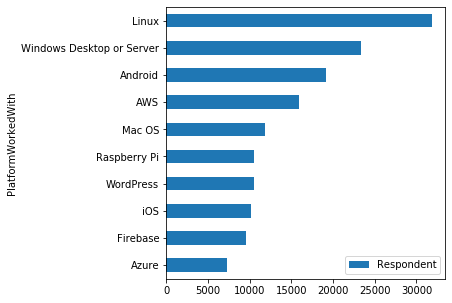

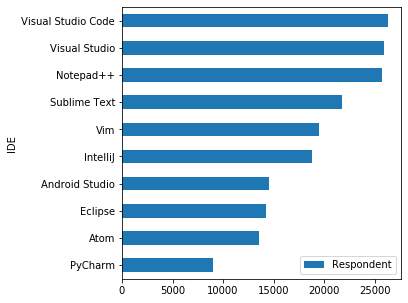

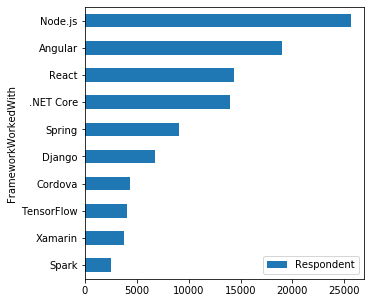

In [211]:
top10_PWW_col.plot(kind= 'barh',  figsize=(5,5))
top10_IDE_col.plot(kind= 'barh',  figsize=(5,5))
top10_FWW_col.plot(kind= 'barh',  figsize=(5,5))

#### Answering Question #3:

As we can see from the above charts, the developer mostly used Linux as a developer platform over windows. Developer platform top choice might be related to the cost associated with working on Windows OS (closed source and expensive) vs Linux OS (open source and free). 

In terms of IDE used by the developer, we would see 2 products from Microsoft in the top list which might indicate that Microsoft IDE is one of the best IDE in the market right now. I was expecting VIM to be in third place but I was surprised that Notepad ++ was there instead. Vim is a highly configurable text editor for efficiently creating and changing any kind of text and is mostly used in Linux.

Finally, for the framework mostly preferred by the developer, the top three places in the ranking were web development framework which used mostly by Full-Stack Developer starting from front-end to back-end.